In [59]:
%run -i 'ABS_model_and_fitting_functions.ipynb'

In [53]:
fparams = {'axes.labelsize': 18,
           'axes.titlesize': 18,
           'font.size': 18,
           'legend.fontsize': 16,
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(fparams)

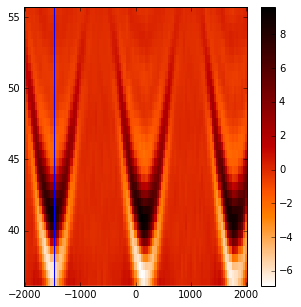

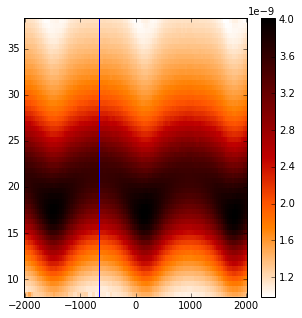

In [18]:
data_abs = prepare_data("data_npy/92_dd.npy", 35, 70)
data_lc = prepare_data("data_npy/92.npy", 6, 60)
a, b = calibration_phase_axis(data_abs, data_lc, 2, 12, 20, 35, plot=True)

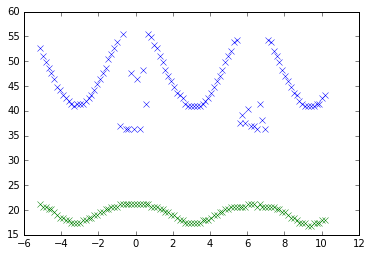

In [3]:
# Peak position are simply chosen as the maxima of each data cut for a fixed phase.
lc_pos = np.array([data_lc['x'][np.argmax(d)] for d in data_lc['z']])
abs_pos = np.array([data_abs['x'][np.argmax(d)] for d in data_abs['z']])
# This leaves some spurious points close to flux = 0 and flux = 1 for the ABS line
plt.plot(data_abs['y'], abs_pos, 'x')
plt.plot(data_lc['y'], lc_pos, 'x')

In [4]:
# These spurious points are removed manually; then we zip phi and V coordinates together
lc_line = zip(data_lc['y'], lc_pos)
abs_line = zip(np.concatenate((data_abs['y'][:28], data_abs['y'][38:69], data_abs['y'][80:])),
               np.concatenate((abs_pos[:28], abs_pos[38:69], abs_pos[80:])))

In [6]:
lines = merge_points([lc_line, abs_line])

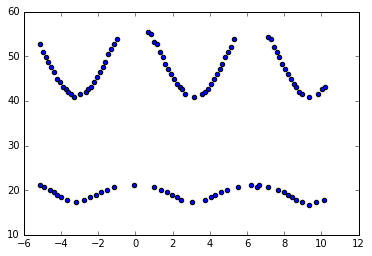

In [7]:
# This is the final dataset
# No error bars (yet..)
phase, frequency = zip(*lines)
plt.scatter(phase, frequency)

## Estimating parameters for the 100 nm device

From David's estimate for $I_J^c$, I take $E_J/h \approx 39.8$ GHz.

The highest measured value for the plasma frequency is $\omega_p\approx 21.2$ GHz, slightly smaller than the one extracted from a fit of the LC resonance at pinch-off, $\omega_\textrm{pinch-off}\approx 24.4$ GHz.

I estimate charging energy as $E_C \approx \omega_p^2 / 2 E_J = 21.2^2 / (2 \cdot 39.8)$ GHz $\approx 5.65$ GHz.

For $E_A$ and transmission $T$, I take similar values as for the $30$ nm device: $E_A\approx 33$ GHz, $T\approx 0.5$.

This gives the set of initial values for the fitting.

## Fit with two free parameters

In [8]:
%%capture
p0 = [31, 0.5]
fit_1 = fit_abs_model(lines, 41, p0, Ej=39.8, Ec=5.65, max_tol=5e-6)

In [9]:
fit_1['popt']

array([ 28.95639642,   0.55397156])

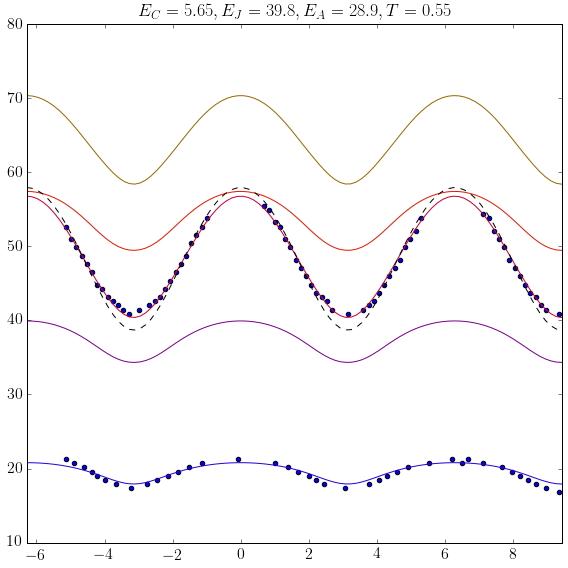

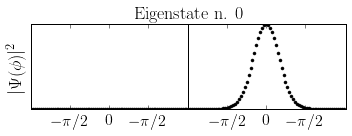

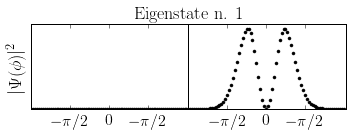

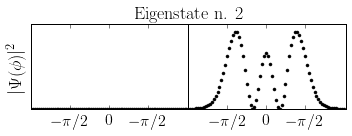

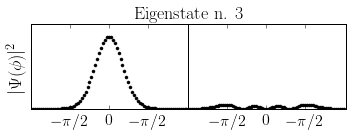

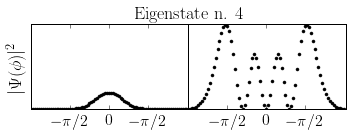

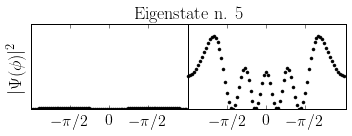

In [60]:
fluxes, freqs, wfs = plot_fit_results(fit_1, lines, Ej=39.8, Ec=5.65, n_fluxes=100, flux_wf=0.)

## Fit with three free parameters

In [11]:
%%capture
p0 = [5.65, 29, 0.55]
fit_2 = fit_abs_model(lines, 41, p0, Ej=39.8)

In [12]:
fit_2['popt']

array([  5.56557985,  28.94780038,   0.55298609])

(array([-6.28318531, -6.12451901, -5.96585272, -5.80718642, -5.64852012,
        -5.48985383, -5.33118753, -5.17252124, -5.01385494, -4.85518865,
        -4.69652235, -4.53785606, -4.37918976, -4.22052346, -4.06185717,
        -3.90319087, -3.74452458, -3.58585828, -3.42719199, -3.26852569,
        -3.10985939, -2.9511931 , -2.7925268 , -2.63386051, -2.47519421,
        -2.31652792, -2.15786162, -1.99919533, -1.84052903, -1.68186273,
        -1.52319644, -1.36453014, -1.20586385, -1.04719755, -0.88853126,
        -0.72986496, -0.57119866, -0.41253237, -0.25386607, -0.09519978,
         0.06346652,  0.22213281,  0.38079911,  0.53946541,  0.6981317 ,
         0.856798  ,  1.01546429,  1.17413059,  1.33279688,  1.49146318,
         1.65012947,  1.80879577,  1.96746207,  2.12612836,  2.28479466,
         2.44346095,  2.60212725,  2.76079354,  2.91945984,  3.07812614,
         3.23679243,  3.39545873,  3.55412502,  3.71279132,  3.87145761,
         4.03012391,  4.1887902 ,  4.3474565 ,  4.5

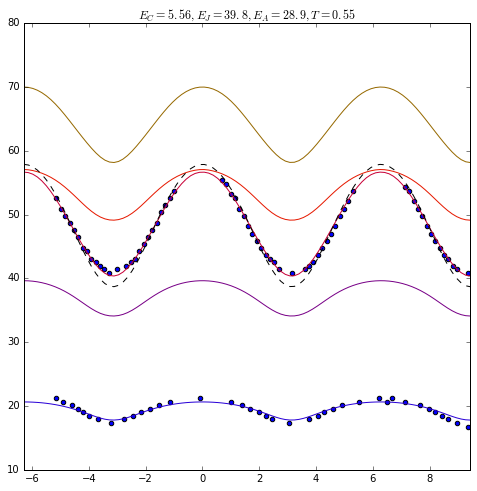

In [13]:
plot_fit_results(fit_2, lines, Ej=39.8)

## Fit with four free parameters

In [14]:
%%capture
p0 = [5.56, 39.8, 29, 0.55]
fit_3 = fit_abs_model(lines, 41, p0)

In [15]:
fit_3['popt']

array([  7.94215255,  29.92520094,  29.19996747,   0.57511862])

(array([-6.28318531, -6.12451901, -5.96585272, -5.80718642, -5.64852012,
        -5.48985383, -5.33118753, -5.17252124, -5.01385494, -4.85518865,
        -4.69652235, -4.53785606, -4.37918976, -4.22052346, -4.06185717,
        -3.90319087, -3.74452458, -3.58585828, -3.42719199, -3.26852569,
        -3.10985939, -2.9511931 , -2.7925268 , -2.63386051, -2.47519421,
        -2.31652792, -2.15786162, -1.99919533, -1.84052903, -1.68186273,
        -1.52319644, -1.36453014, -1.20586385, -1.04719755, -0.88853126,
        -0.72986496, -0.57119866, -0.41253237, -0.25386607, -0.09519978,
         0.06346652,  0.22213281,  0.38079911,  0.53946541,  0.6981317 ,
         0.856798  ,  1.01546429,  1.17413059,  1.33279688,  1.49146318,
         1.65012947,  1.80879577,  1.96746207,  2.12612836,  2.28479466,
         2.44346095,  2.60212725,  2.76079354,  2.91945984,  3.07812614,
         3.23679243,  3.39545873,  3.55412502,  3.71279132,  3.87145761,
         4.03012391,  4.1887902 ,  4.3474565 ,  4.5

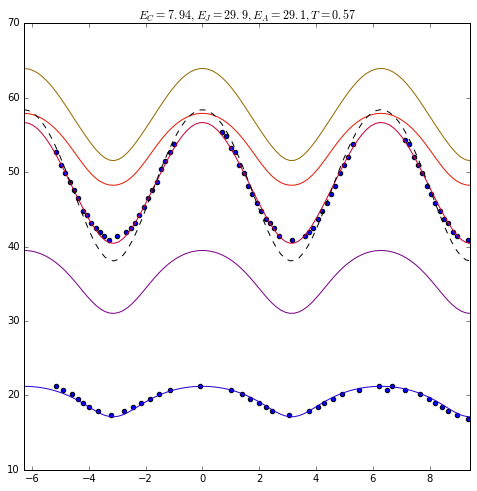

In [16]:
plot_fit_results(fit_3, lines)

## Figure

In [61]:
an_full = prepare_data("data_npy/92_dd_full.npy", 0, 0, chop=False)
z = an_full['z'].T[::-1]
x = an_full['x']
y = an_full['y']
y -= b
y /= a
y *= 2*np.pi
dx, dy = x[1]-x[0], y[1]-y[0]
ranges = [y[0]-dy/2, y[-1]+dy/2, x[0]-dx/2, x[-1]+dx/2]

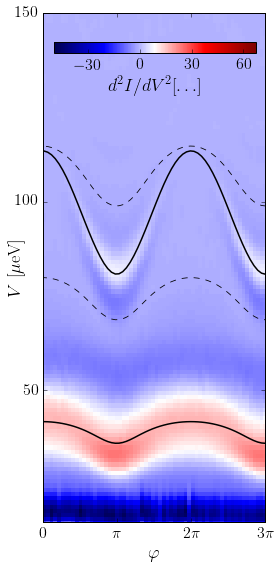

In [73]:
fig, ax = plt.subplots(figsize=(4,8))
im = ax.imshow(z, extent = ranges, aspect='auto', interpolation='none', cmap='seismic')
cbaxes = fig.add_axes([0.2, 0.9, 0.7, 0.02]) 
#cbar = plt.colorbar(cax, orientation='horizontal')
cbar = fig.colorbar(im, cax=cbaxes, orientation='horizontal')
cbaxes.set_xlabel(r'$d^2 I/dV^2 [\dots]$')
cbar.set_ticks([-30, 0, 30, 60])
ax.plot(fluxes, 2*freqs.T[0], c='k', ls='-', lw=1.5)
ax.plot(fluxes, 2*freqs.T[1], c='k', ls='--', lw=0.8)
ax.plot(fluxes, 2*freqs.T[2], c='k', ls='-', lw=1.5)
ax.plot(fluxes, 2*freqs.T[3], c='k', ls='--', lw=0.8)
ax.set_xlim([0, 3*np.pi])
ax.set_ylim([15, 150])
ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi])
ax.set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
ax.set_yticks([50, 100, 150])
ax.set_xlabel(r'$\varphi$')
ax.set_ylabel(r'$V\,\,[\mu$eV]', labelpad=-10)
#ax.set_yticklabels([r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.savefig("figures/fit_dev_92.pdf")

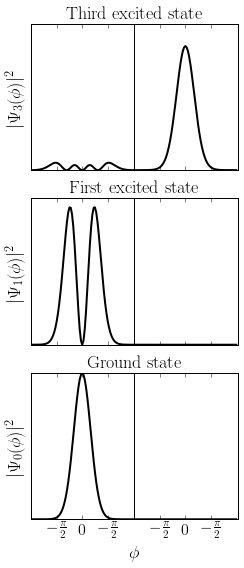

In [72]:
# Two subplots, the axes array is 1-d
f, ax = plt.subplots(3, sharex=True, figsize=(3.5,8))
L = len(wfs[0])

ax[0].plot(np.abs(wfs[3][::-1])**2, c='k', lw=2)
ax[0].set_xlim(0, L)
ax[0].axvline(L/2, c='k')
ax[0].set_ylabel(r'$|\Psi_3(\phi)|^2$')
ax[0].set_xticks([L/8, L/4, 3*L/8, 5*L/8, 3*L/4, 7*L/8])
ax[0].set_yticks([])
ax[0].set_title('Third excited state')
#ax[0].set_title(r'Eigenstate n. %s' % n)

ax[1].plot(np.abs(wfs[1][::-1])**2,  c='k', lw=2)
ax[1].set_xlim(0, L)
ax[1].axvline(L/2, c='k')
ax[1].set_ylabel(r'$|\Psi_1(\phi)|^2$')
ax[1].set_xticks([L/8, L/4, 3*L/8, 5*L/8, 3*L/4, 7*L/8])
#ax[1].set_xticklabels([r'$-\pi/2$', r'$0$', r'$-\pi/2$', r'$-\pi/2$', r'$0$', r'$-\pi/2$'])
ax[1].set_title('First excited state')
ax[1].set_yticks([])

ax[2].plot(np.abs(wfs[0][::-1])**2, c='k', lw=2)
ax[2].set_xlim(0, L)
ax[2].axvline(L/2, c='k')
ax[2].set_ylabel(r'$|\Psi_0(\phi)|^2$')
ax[2].set_xlabel(r'$\phi$')
ax[2].set_xticks([L/8, L/4, 3*L/8, 5*L/8, 3*L/4, 7*L/8])
ax[2].set_xticklabels([r'$-\frac{\pi}{2}$', r'$0$', r'$-\frac{\pi}{2}$',
                       r'$-\frac{\pi}{2}$', r'$0$', r'$-\frac{\pi}{2}$'])
ax[2].set_title('Ground state')
ax[2].set_yticks([])
plt.savefig("figures/wavefunction_dev_92.pdf")